## Steps to do for google collab users

In [94]:
# nothing

# Introduction

Context: Train a decision tree to classify Iris sub species base on their sepal and petal characteristics

## Goal

- Understand and visualize the rules learned by a decision tree
- Derive some rule based algorithms using decision trees

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split

# Decision Tree 

### Load Iris Dataset

In [40]:
iris = datasets.load_iris()

![iris dataset](../images/iris-machinelearning.png)

**Description**: Images of the 3 iris classes (class 2 - 1 - 3)

In [42]:
print(iris.DESCR[:1000])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Split dataset into train test


In [18]:
test_size = 0.3
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=2)

### Training

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=2)
clf = clf.fit(X_train, y_train)

In [46]:
pred = clf.predict(X_test)

In [47]:
# prediction on test set 
accuracy = round((pred == y_test).sum()/len(y_test), 2)
print(f"Accuracy Tree model is of {accuracy}, N_test={len(y_test)}")

Accuracy Tree model is of 0.98, N_test=45


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, pred)
print("Confusion matrix \n", cm)

Confusion matrix 
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


### Plot rules of decision tree

In [50]:
print(tree.export_text(clf, feature_names=iris['feature_names']))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### Plot the tree

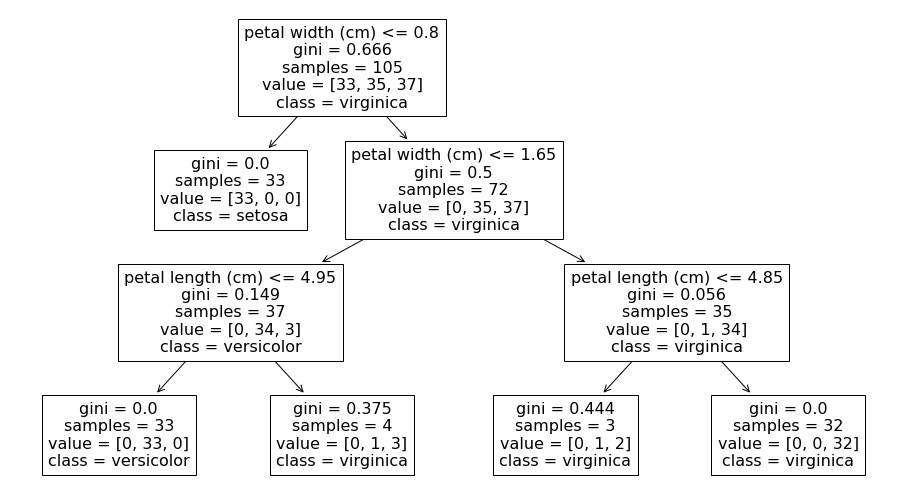

In [25]:
plt.figure(figsize=(16,9))
tree.plot_tree(clf, feature_names=iris['feature_names'], class_names=iris["target_names"])
plt.show()

### Questions 
1. Is my decision tree suited for the task ?
    - yes precision and recall are excellent
2. Can I explore the reasons behind a prediciton ?
    - yes by looking inside the tree, we understand each condition that led to the final classification.
    - but what if the tree was very deep, or the number of variables very high ?
3. How would you rank the 4 features in terms of importance to predict the iris category ?
    - From this model, it looks like petal width > petal length > sepal info
    - but what if the features are correlated ?


### Conclusion

- With simple methods in scikit learn, you can inspect the inside of tree and understand which are the rules that lead to what decisions.

#### What do my predictions look like with a basic tree 

In [26]:
pred # N=45

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

# Rule based algorithm

Rule based algorithm can be created in 2 ways. 
- either you have some knowledge and intuition about the rules (either by common sense or Suject matter expert guidance). example: Fraud detection, offensive language detection
- you don't know anything about the rules

### Create rules from knowledge and expertise (TBD)

(Assumptions: Rules are made by an unbiased expert)
- Can serve as a baseline algorithm
- Are 100% explainable 

----

### Derive some rules from a ML model (Tree)

Reasons to do this: 
- I have no prior knowledge of the relationship between sepal and petal length and iris type.  
    - But I would like to provide some explanations (be it right or wrong) on top of the prediction
- I must come up with a solution in production without a machine learning model



In [95]:
def rule_based_iris_classifier(petal_width, petal_length):
    """
    param: 
        - petal_width: float
        - petal_lenght: float
    return:
        - class of iris (0, 1 or 2)
        - explanation (small text that explains why this choice was made)
    """
    if petal_width <= 0.8:
        return 0, "Petal width small"
    if petal_width <= 1.65:
        if petal_length <= 4.95:
            return 1, "Petal width medium and petal length small"
        if petal_length > 4.95:
            return 2, "Petal width medium and petal length high"

    return 2, "Petal width high"

### Make predictions using the rule based algorithm

In [96]:
rulebased_pred = []
explanations = []
for petal_length, petal_width in X_test[:,2:]:
    prediction, explanation = rule_based_iris_classifier(petal_width, petal_length)
    rulebased_pred.append(prediction)
    explanations.append(explanation)

rulebased_pred = np.array(rulebased_pred)

In [98]:
if np.array_equal(rulebased_pred, pred):
    print("Rule based method behaves like the trained tree")
else:
    print("Predictions from rule based and trained tree are different")

Rule based method behaves like the trained tree


In [89]:
# prediction on test set 
accuracy = round((rb_pred == y_test).sum()/len(y_test), 2)
print(f"Accuracy rule based model is of {accuracy}, N_test={len(y_test)}")

Accuracy rule based model is of 0.98, N_test=45


#### rule based predictions  with explanations

In [91]:
[(rb_pred[i], explanations[i]) for i in range(len(rb_pred))]

[(0, 'Petal width small'),
 (0, 'Petal width small'),
 (2, 'Petal width high'),
 (0, 'Petal width small'),
 (0, 'Petal width small'),
 (2, 'Petal width medium and petal length high'),
 (0, 'Petal width small'),
 (2, 'Petal width high'),
 (2, 'Petal width high'),
 (0, 'Petal width small'),
 (0, 'Petal width small'),
 (0, 'Petal width small'),
 (0, 'Petal width small'),
 (0, 'Petal width small'),
 (1, 'Petal width medium and petal length small'),
 (1, 'Petal width medium and petal length small'),
 (0, 'Petal width small'),
 (1, 'Petal width medium and petal length small'),
 (2, 'Petal width high'),
 (1, 'Petal width medium and petal length small'),
 (2, 'Petal width high'),
 (1, 'Petal width medium and petal length small'),
 (2, 'Petal width high'),
 (1, 'Petal width medium and petal length small'),
 (1, 'Petal width medium and petal length small'),
 (0, 'Petal width small'),
 (0, 'Petal width small'),
 (2, 'Petal width high'),
 (0, 'Petal width small'),
 (2, 'Petal width high'),
 (2, 'P

## Conclusion

- By looking at the rules of a tree, we can verify that the rules make sense, or learn more about the topic
- Those rules can help us build a normal rule based algorithms 